<a href="https://colab.research.google.com/github/Kishan-Kumar-Zalavadia/Machine-Learning_Project/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/ravi72munde/uber-lyft-cab-prices

https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
ride = pd.read_csv("/content/cab_rides.csv")
ride.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
693066,1.0,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.0,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.0,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.0,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV
693070,1.0,Uber,1543708385534,North End,West End,10.0,1.0,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool


In [ ]:
weather = pd.read_csv("/content/weather.csv")
weather.tail()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54
6275,44.69,West End,0.89,1000.70,NaN,1543819974,0.96,1.52


In [ ]:
rides_dataset = pd.read_csv("/content/rideshare_kaggle.csv")
rides_dataset.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [ ]:
# Nmber of null values
count = ride.isna().sum().sum()
count

55095

In [ ]:
# Removing the null values
ride = ride.dropna()
ride

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693065,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


Text(0.5, 1.0, 'Bar Plot: Different Rides')

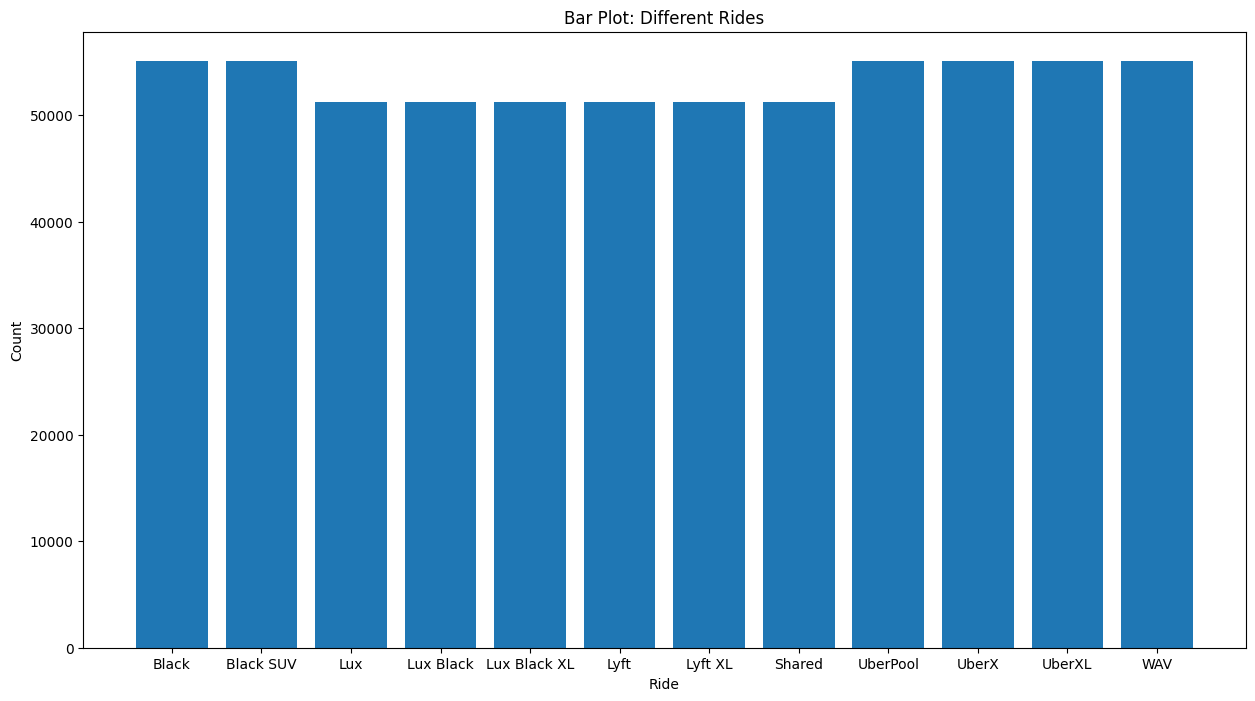

In [ ]:
unique_class, counts = np.unique(ride["name"], return_counts=True)
plt.figure(figsize=(15, 8))
plt.bar(unique_class, counts)

plt.xlabel('Ride')
plt.ylabel('Count')
plt.title('Bar Plot: Different Rides')

Text(0.5, 1.0, 'Bar Plot: Different cab types')

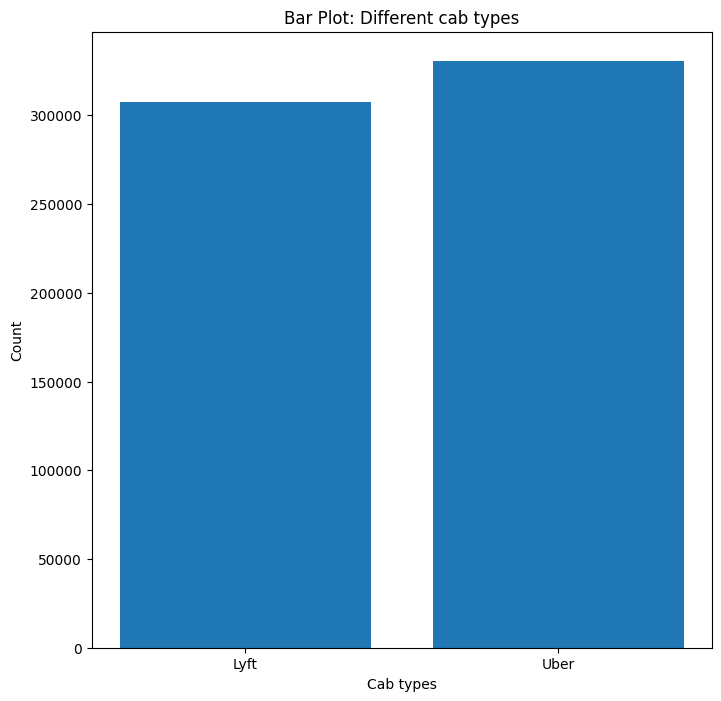

In [ ]:
unique_class, counts = np.unique(ride["cab_type"], return_counts=True)
plt.figure(figsize=(8, 8))
plt.bar(unique_class, counts)

plt.xlabel('Cab types')
plt.ylabel('Count')
plt.title('Bar Plot: Different cab types')

In [ ]:
features = ride._get_numeric_data()
features = features.drop(columns="time_stamp")
features

,distance,price,surge_multiplier
0,0.44,5.0,1.0
1,0.44,11.0,1.0
2,0.44,7.0,1.0
3,0.44,26.0,1.0
4,0.44,9.0,1.0
...,...,...,...
693065,1.00,9.5,1.0
693066,1.00,13.0,1.0
693067,1.00,9.5,1.0
693069,1.00,27.0,1.0


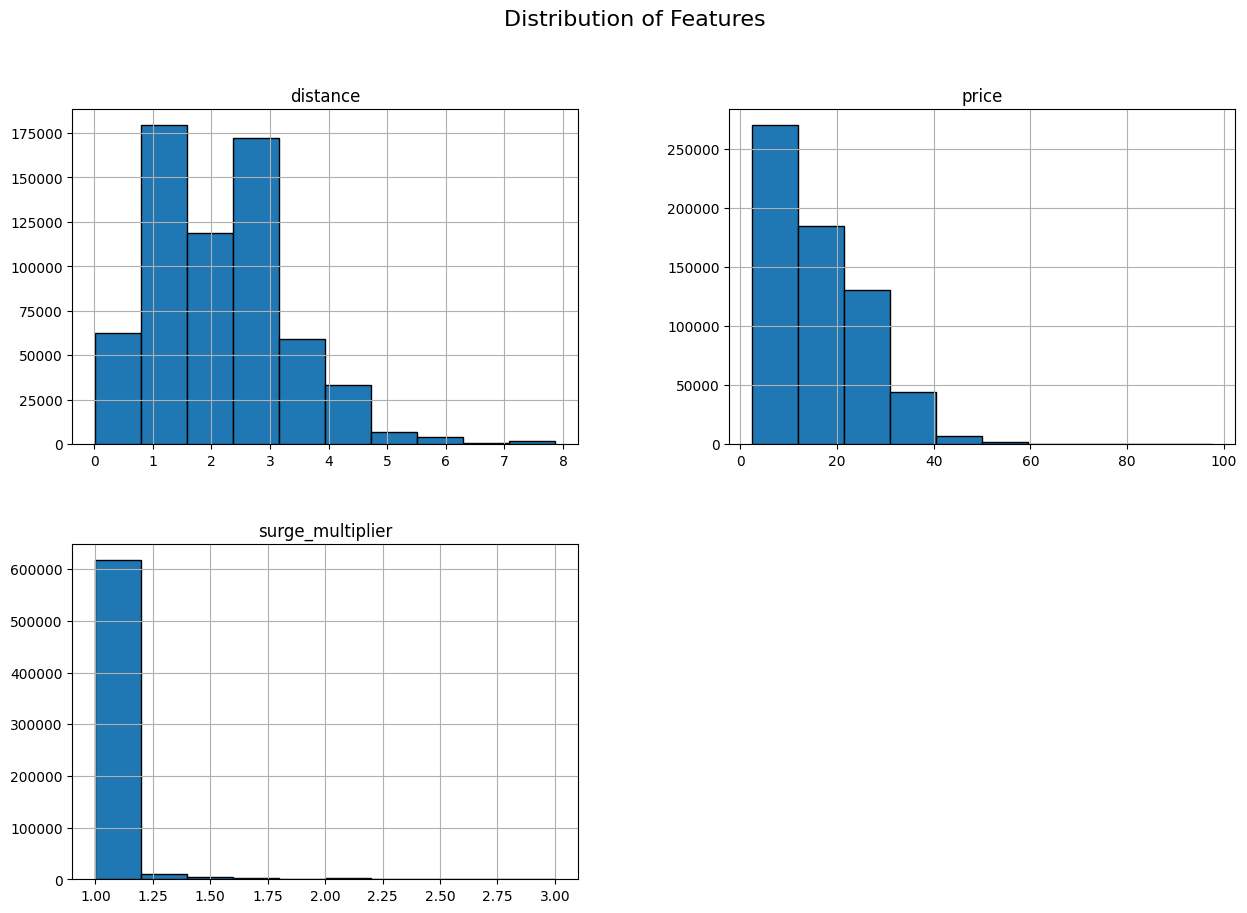

In [ ]:

features.hist(bins=10, edgecolor='k', figsize=(15, 10))
plt.suptitle('Distribution of Features', fontsize=16)
plt.show()

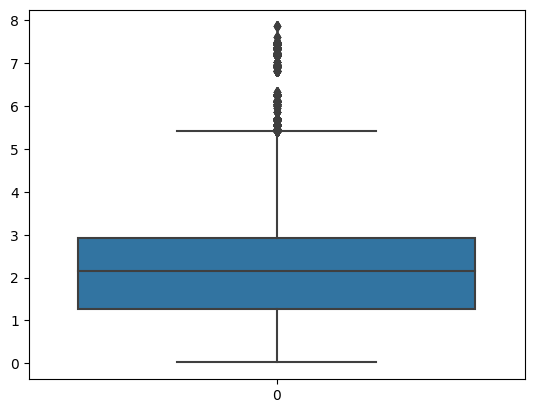

In [ ]:
columns = ["distance", "price", "surge_multiplier"]
#plt.figure(figsize=(15, 10))
sns.boxplot(data=ride["distance"])
plt.show()

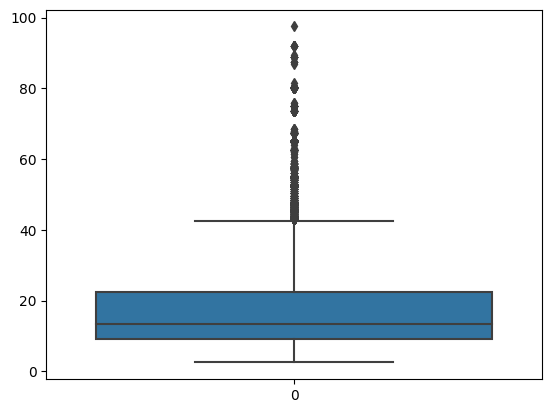

In [ ]:
sns.boxplot(data=ride["price"])
plt.show()

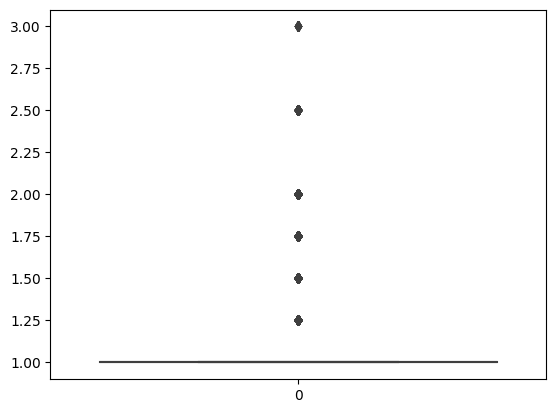

In [ ]:
sns.boxplot(data=ride["surge_multiplier"])
plt.show()

In [ ]:
X = ride.drop(columns="cab_type")
y = ride['cab_type']

In [ ]:
y = y.replace({'Uber': 0, 'Lyft': 1})
y.tail()

In [ ]:
grouped = ride.groupby('cab_type')
uber = grouped.get_group('Uber')
lyft = grouped.get_group('Lyft')

Text(0.5, 1.0, 'Scatter Plot')

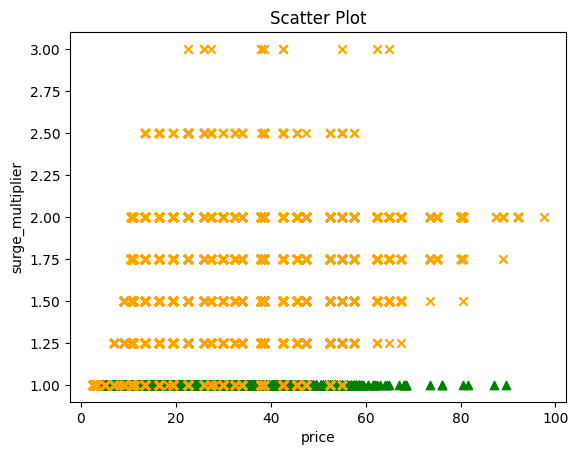

In [ ]:
plt.scatter(uber['price'],uber['surge_multiplier'],c="green",marker ="^")
plt.scatter(lyft['price'],lyft['surge_multiplier'],c="orange",marker ="x")
plt.xlabel('price')
plt.ylabel('surge_multiplier')
plt.title('Scatter Plot')